In [1]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_excel('Premier_league_teams.xls')
team=df['squad']
df.drop('squad',axis=1,inplace=True)
print(df)
class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features

    def fit(self, X):
        if not self.q:
            self.q = 4

        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA(n_components=self.q).fit(X) # calculation Cov matrix is embeded in PCA
        A_q = pca.components_.T

        kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]
        
### Above part of code thanks to  https://bechirtr97.medium.com/feature-selection-in-unsupervised-learning-problems-585a56d024bd

    possession  goals  assists  pens_made  pens_att  cards_yellow  \
0         47.4     13        6          0         2            18   
1         47.2     13       10          2         2            25   
2         46.2     13        7          1         1            20   
3         55.8     12        9          3         3            28   
4         38.7     10        9          0         0            26   
5         58.4     26       17          2         2            12   
6         51.4     15        9          2         2            19   
7         41.4     16       13          3         3            20   
8         58.4     11        7          1         1            24   
9         51.8     16       12          0         0            14   
10        62.1     31       25          1         1            12   
11        64.5     20       14          0         0            18   
12        53.5     19       17          0         1            25   
13        38.0     11       10    

In [24]:
corr=df.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]       

In [16]:
df.shape

(20, 186)

In [2]:
# Usage
pfa = PFA(n_features=8)
pfa.fit(df)
# To get the transformed matrix
x = pfa.features_
#print(x)
# To get the column indices of the kept features
column_indices = pfa.indices_

In [3]:
column_indices

[156, 113, 111, 22, 51, 116, 171, 123]

In [4]:
df=df.iloc[:,[156, 113, 111, 22, 51, 116, 171, 123]]

In [ ]:
[156, 113, 111, 22, 51, 116, 171, 123]

In [5]:
df.head()

,carry_progressive_distance,gca_per90,sca_fouled,saves,shots_total,gca_dribbles,aerials_won,tackles_mid_3rd
0,12443,1.55,14,30,155,0,178,58
1,8534,2.09,13,30,127,3,208,68
2,8518,1.45,9,25,134,0,259,86
3,11834,1.82,12,26,128,1,158,81
4,6339,1.45,9,31,123,0,284,71


For n_clusters 2 The Silhouette_score is : 0.5296335757423878
For n_clusters 3 The Silhouette_score is : 0.6142200294412018
For n_clusters 4 The Silhouette_score is : 0.6469005030692575
For n_clusters 5 The Silhouette_score is : 0.639432584023485
For n_clusters 6 The Silhouette_score is : 0.5875956253018895
For n_clusters 7 The Silhouette_score is : 0.5944508910853716
For n_clusters 8 The Silhouette_score is : 0.6221887549217147


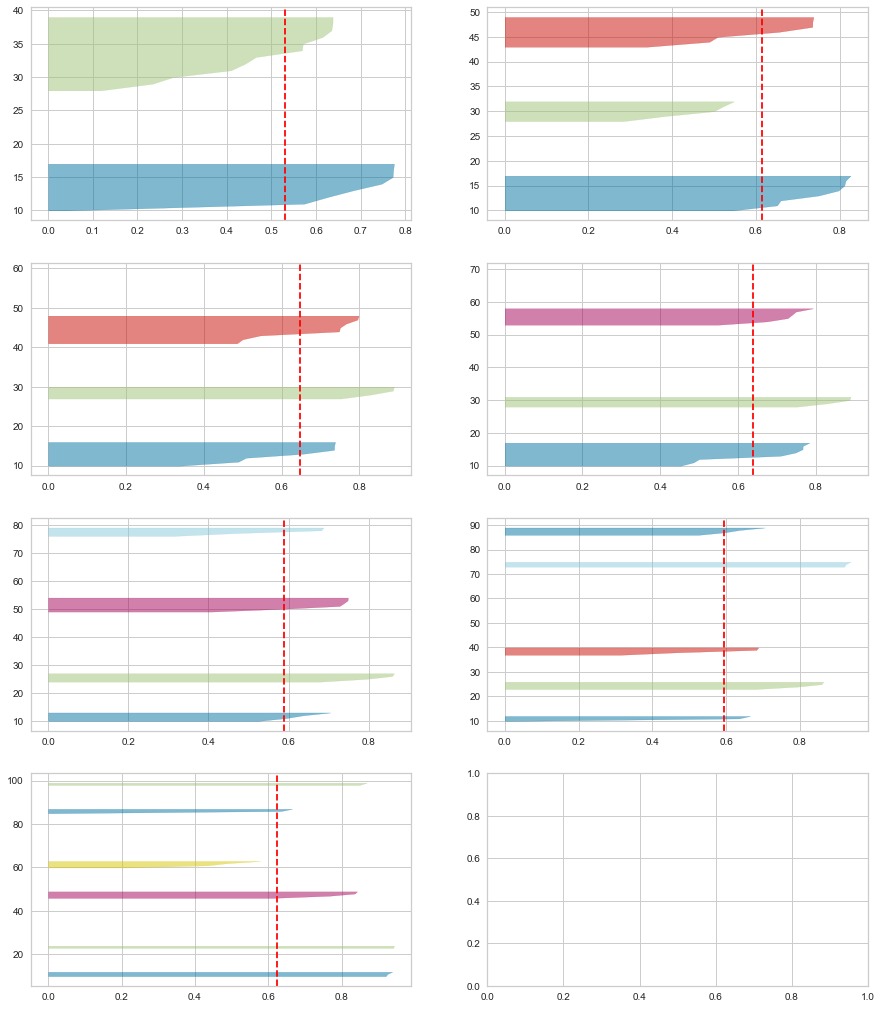

In [6]:
fig, ax =plt.subplots(4,2, figsize=(15,18))
for i in [2,3,4,5,6,7,8]:
    
    km=KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    predicted_values=km.fit_predict(df)
    q, mod=divmod(i,2)
    a=0
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    a=a+1
    visualizer.fit(df)
    silhouette_value=silhouette_score(df,predicted_values)
    print("For n_clusters",
         i,
         "The Silhouette_score is :",
         silhouette_value,
         )

In [7]:
km=KMeans(n_clusters=4)

In [8]:
km.fit(df)
predicted_vales=km.fit_predict(df)
silhouette_score(df,predicted_vales)


0.6469005030692575

In [9]:
labels=pd.DataFrame(predicted_vales)
labels.rename(columns={0:'class'},inplace=True)

In [10]:
labels.to_excel('labels.xls')

In [11]:
km.cluster_centers_

array([[8.59057143e+03, 1.66142857e+00, 1.04285714e+01, 3.05714286e+01,
        1.24857143e+02, 1.00000000e+00, 2.14285714e+02, 7.05714286e+01],
       [1.41345000e+04, 3.36500000e+00, 1.25000000e+01, 2.97500000e+01,
        1.75500000e+02, 3.00000000e+00, 1.67000000e+02, 6.85000000e+01],
       [1.81320000e+04, 2.45000000e+00, 8.00000000e+00, 1.30000000e+01,
        1.96000000e+02, 1.00000000e+00, 1.43000000e+02, 7.00000000e+01],
       [1.16838750e+04, 1.87500000e+00, 1.15000000e+01, 3.05000000e+01,
        1.35000000e+02, 1.25000000e+00, 1.80125000e+02, 7.73750000e+01]])

In [12]:
cluster=km.cluster_centers_

In [13]:
cluster=pd.DataFrame(cluster,columns=df.columns)

In [44]:
### TO DO: plot cluster centers to visualize differences between groups & characteristics of each group###

In [14]:
cluster

,carry_progressive_distance,gca_per90,sca_fouled,saves,shots_total,gca_dribbles,aerials_won,tackles_mid_3rd
0,8590.571429,1.661429,10.428571,30.571429,124.857143,1.00,214.285714,70.571429
1,14134.500000,3.365000,12.500000,29.750000,175.500000,3.00,167.000000,68.500000
2,18132.000000,2.450000,8.000000,13.000000,196.000000,1.00,143.000000,70.000000
3,11683.875000,1.875000,11.500000,30.500000,135.000000,1.25,180.125000,77.375000


In [15]:
import seaborn as sns


In [82]:
a=100
cluster['carry_progressive_distance']=cluster['carry_progressive_distance'].apply(lambda x: x/1000)

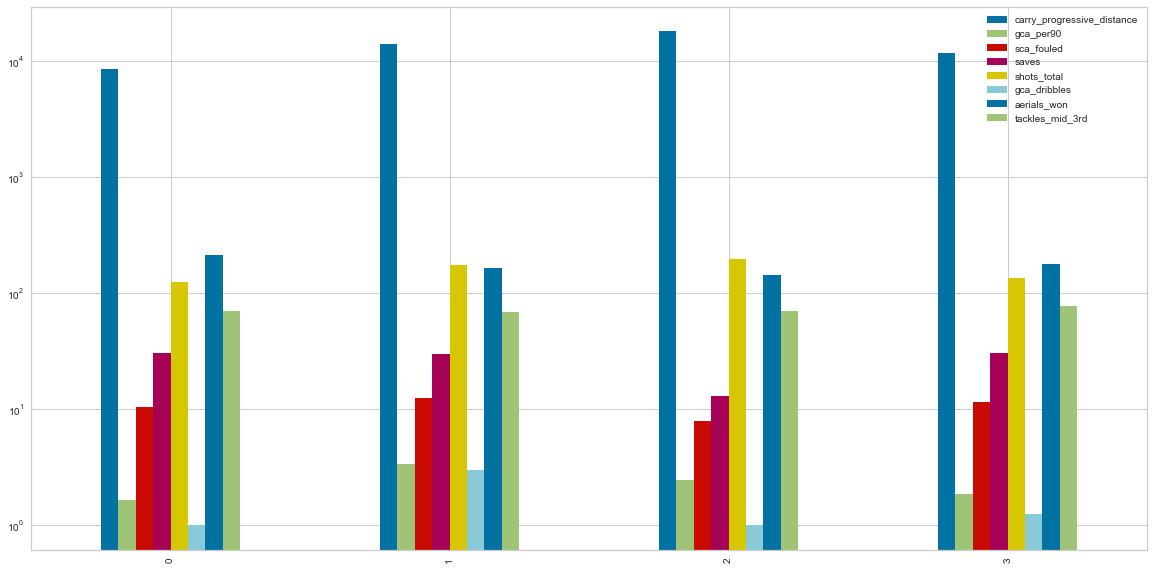

In [16]:
cluster.plot.bar(figsize=(20, 10), logy=True)

In [17]:
result=pd.concat([labels,team,df], axis=1)

In [18]:
result.iloc[1,0]

0

In [19]:
group=dict()
for i in range(result.shape[0]):
    cluster=result.iloc[i,0]
    club=result.iloc[i,1] 
    if  cluster in group:
        if not isinstance(group[cluster], list):
            group[cluster]=[group[cluster]]
        group[cluster].append(club)    
        
    else:
        group[cluster]= club
        
print(group)    

{3: ['Arsenal', 'Brighton', 'Crystal Palace', 'Leicester City', 'Southampton', 'Tottenham', 'West Ham', 'Wolves'], 0: ['Aston Villa', 'Brentford', 'Burnley', 'Everton', 'Newcastle Utd', 'Norwich City', 'Watford'], 1: ['Chelsea', 'Leeds United', 'Liverpool', 'Manchester Utd'], 2: 'Manchester City'}


In [122]:
 type(group[cluster])

list